# HW #6: Evaluating SVM
---

In this HW, you'll explore several data sets with SVM classifiers and compare them to logistic regression classifiers.  

Use markdown cells to explain your observation.  

We will use two data sets:

**Breast Cancer**

    breast_cancer.csv

**Car Evaluation**

    car.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1kxV5c1FgaUM-KFoHVAM7-np6LnpIFZxQ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('breast_cancer.csv')


downloaded = drive.CreateFile({'id':'1ILf9_rzNvU9ip4_tyQx3oVSrMciMg_sm'}) # replace the id with id of file you want to access
downloaded.GetContentFile('car.csv')

### 1) Load the breast cancer data.

- Are there any missing values? If so, impute or clean the data set.
- Select a classification target and predictors.

In [0]:
df = pd.read_csv('breast_cancer.csv', na_values='?')

In [0]:
# A:
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    683 non-null float64
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [0]:
#check if the dataframe has null value
df.isnull().sum()

Sample_code_number              0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

**df has null values in Bare_Nuclei column**

In [0]:
#find all missing values
df[df.Bare_Nuclei.isnull()]

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [0]:
#check values in Bare_Nuclei column
df.Bare_Nuclei.value_counts()

1.0     402
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

Since it is hard to assign a value to the NaN value, I decide to drop them.

In [0]:
df=df.dropna()

**Then I begin to select a classification target and predictors.**


**First, I check the values of Class Column**

In [0]:
df.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

**I convert the vaules in target to 0/1 **

In [0]:
df['Class'].replace({2:0, 4:1}, inplace=True)
df.Class.value_counts()

0    444
1    239
Name: Class, dtype: int64

**Then, I want to check the features' correlations to the target "Class"**

In [0]:
df.corr().abs().Class.sort_values(ascending=False)[1:]

Bare_Nuclei                    0.822696
Uniformity_of_Cell_Shape       0.821891
Uniformity_of_Cell_Size        0.820801
Bland_Chromatin                0.758228
Normal_Nucleoli                0.718677
Clump_Thickness                0.714790
Marginal_Adhesion              0.706294
Single_Epithelial_Cell_Size    0.690958
Mitoses                        0.423448
Sample_code_number             0.084701
Name: Class, dtype: float64

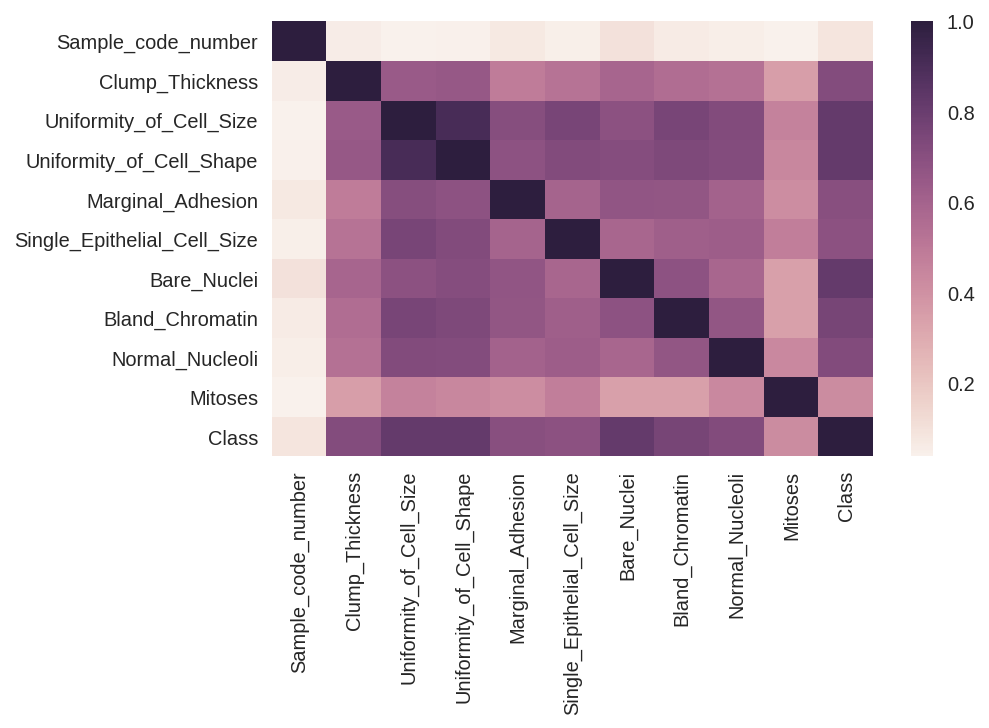

In [0]:
sns.heatmap(df.corr().abs())

**The correlation shows only Sample_code_number has little relationship with the target "Class". Therefore, I choose all features except "Sample_code_number" as predictor.**

**Create a feature matrix X a series y**

In [0]:
y=df['Class']
X = df.iloc[:,1:9]

### 2) Build an SVM classifier on the data.

For details on the SVM classifier, [click here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

- Initialize and train a linear SVM. What's the average accuracy score with a five-fold cross-validation?
- Repeat using a radial basis function (RBF) classifier. Compare the scores. Which one is better?
- Print a confusion matrix and classification report for your best model using training and testing data.

**[View Classification report and Confusion matrix coding example here](http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/)**

**Initialize and train a linear SVM. What's the average accuracy score with a five-fold cross-validation?**

In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
kf = KFold(n_splits=5,shuffle=True)

In [0]:
svc = SVC(kernel = 'linear')        # linear
print( "SVM with linear kernel:",cross_val_score(svc, X, y, cv=kf, scoring='accuracy').mean())

SVM with linear kernel: 0.9707385143838557


Repeat using a radial basis function (RBF) classifier. Compare the scores. Which one is better?

In [0]:
rbf_svc = SVC(kernel = 'rbf', gamma='auto', C=1)           # rbf


#Establish true y values
#y_true1 = y_train
kf = KFold(n_splits=5)
print("SVM with rbf kernel:",cross_val_score(rbf_svc, X, y, cv=kf, scoring='accuracy').mean())

SVM with rbf kernel: 0.9561292400171748


**SVM with Linear is better**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(478, 8) (478,)
(205, 8) (205,)


In [0]:
# A:
#Create instance of Support Vector Classifier
svc = SVC(kernel = 'linear')

#Fit estimator to 70% of the data
svc.fit(X_train, y_train)

#Predict final 30%
y_pred = svc.predict(X_test)

#Establish true y values
y_true = y_test


**Print a confusion matrix and classification report for your best model using training and testing data.**


In [0]:
confusion_df = pd.DataFrame(confusion_matrix(y_true,y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1
Class 0                132                  4
Class 1                  1                 68


In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       136
           1       0.94      0.99      0.96        69

   micro avg       0.98      0.98      0.98       205
   macro avg       0.97      0.98      0.97       205
weighted avg       0.98      0.98      0.98       205



#### 2.A) Are there more false positives or false negatives? Is this good or bad?

**There are 4 false positive and 1 false negative. The precision rate 94.4 is % and the recall rate is 98.5%. Therefore, I think it is good**

### 3) Compare SVM and logistic regression using cars' dataset.

You should work on the following:

- With default hyperparameters, compare the performance of SVM vs. Logistic Regression
- What choice of kernel would give SVM the best performance

Use the following to discuss performance
- The mean value of cross-validate scores.
- Examine confusion matrices and classification reports.


In [0]:
car = pd.read_csv('car.csv')
car.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying           1728 non-null object
maint            1728 non-null object
doors            1728 non-null object
persons          1728 non-null object
lug_boot         1728 non-null object
safety           1728 non-null object
acceptability    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [0]:
from sklearn.preprocessing import LabelEncoder
y1 = LabelEncoder().fit_transform(car['acceptability'])
X1 = pd.get_dummies(car.drop('acceptability', axis=1))
X1.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [0]:
y1_df=pd.DataFrame(y1, columns=['acceptability'])
y1_df.head()



,acceptability
0,2
1,2
2,2
3,2
4,2


In [0]:
car1 = pd.concat([X1, y1_df], axis=1)
car1.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,acceptability
0,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,2
1,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,2
2,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,2
3,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,2
4,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,2


**With default hyperparameters, compare the performance of SVM vs. Logistic Regression**

In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
kf = KFold(n_splits=5,shuffle=True)

In [0]:
 # A:
logreg = LogisticRegression()
print("Logistic Regression:",cross_val_score(logreg, X1, y1, cv=kf, scoring='accuracy').mean())

Logistic Regression: 0.8813520985172154


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [0]:
svc = SVC(gamma='auto')        
print( "SVM is:",cross_val_score(svc, X1, y1, cv=kf, scoring='accuracy').mean())

SVM is: 0.9068241601742482


**Therefore, SVM is better than Logistic Regression**

**What choice of kernel would give SVM the best performance**

In [0]:
svc_linear = SVC(kernel = 'linear', gamma='auto')        # linear
print( "SVM with linear kernel:",cross_val_score(svc_linear, X1, y1, cv=kf, scoring='accuracy').mean())


poly_svc = SVC(kernel = 'poly', degree = 3, gamma='auto')       #  polys
print("SVM with poly kernel:",cross_val_score(poly_svc, X1, y1, cv=kf, scoring='accuracy').mean())

rbf_svc = SVC(kernel = 'rbf', C=1, gamma='auto')           # rbf
print("SVM with rbf kernel:",cross_val_score(rbf_svc, X1, y1, cv=kf, scoring='accuracy').mean())

SVM with linear kernel: 0.9357577280723801
SVM with poly kernel: 0.7002446175756052
SVM with rbf kernel: 0.9074005193934823


**SVM with linear kernel is 0.933 **

**SVM with poly kernel: 0.7002**

**SVM with rbf kernel: 0.905**

**Therefore, SVM with linear kernel is the best performance**

**Examine confusion matrices and classification reports.**

In [0]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
print (X1_train.shape, y1_train.shape)
print (X1_test.shape, y1_test.shape)

(1209, 21) (1209,)
(519, 21) (519,)


In [0]:
# A:
#Create instance of Support Vector Classifier
svc = SVC()  
#Fit estimator to 70% of the data
svc.fit(X1_train, y1_train)
logreg.fit(X1_train, y1_train)
svc_linear.fit(X1_train, y1_train)
poly_svc.fit(X1_train, y1_train)
rbf_svc.fit(X1_train, y1_train)
#Predict final 30%
y_pred_svc = svc.predict(X1_test)
y_pred_lr = logreg.predict(X1_test)
y_pred_linear= svc_linear.predict(X1_test)
y_pred_poly = poly_svc.predict(X1_test)
y_pred_rbf = rbf_svc.predict(X1_test)
#Establish true y values
y1_true = y1_test

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


**Confusion matrix for SVM:**

In [0]:
confusion_df = pd.DataFrame(confusion_matrix(y1_true,y_pred_svc),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1, 2, 3]],
             index = ["Class " + str(class_name) for class_name in [0,1, 2, 3]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Class 0                109                  0                  0   
Class 1                 11                  3                  0   
Class 2                 26                  1                345   
Class 3                 15                  0                  0   

         Predicted Class 3  
Class 0                  0  
Class 1                  1  
Class 2                  0  
Class 3                  8  


**Confusion matrix for Logistic Regression:**

In [0]:
confusion_df = pd.DataFrame(confusion_matrix(y1_true, y_pred_lr),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1, 2, 3]],
             index = ["Class " + str(class_name) for class_name in [0,1, 2, 3]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Class 0                 90                  3                 16   
Class 1                 11                  4                  0   
Class 2                 19                  1                352   
Class 3                 18                  1                  0   

         Predicted Class 3  
Class 0                  0  
Class 1                  0  
Class 2                  0  
Class 3                  4  


**Confusion matrix for SVM with linear:**

In [0]:
confusion_df = pd.DataFrame(confusion_matrix(y1_true,y_pred_linear),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1, 2, 3]],
             index = ["Class " + str(class_name) for class_name in [0,1, 2, 3]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Class 0                 93                  2                 14   
Class 1                  2                 13                  0   
Class 2                 14                  1                357   
Class 3                  0                  0                  0   

         Predicted Class 3  
Class 0                  0  
Class 1                  0  
Class 2                  0  
Class 3                 23  


**Confusion matrix for SVM with poly:**

In [0]:
confusion_df = pd.DataFrame(confusion_matrix(y1_true,y_pred_poly),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1, 2, 3]],
             index = ["Class " + str(class_name) for class_name in [0,1, 2, 3]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Class 0                  0                  0                109   
Class 1                  0                  0                 15   
Class 2                  0                  0                372   
Class 3                  0                  0                 23   

         Predicted Class 3  
Class 0                  0  
Class 1                  0  
Class 2                  0  
Class 3                  0  


**Confusion matrix for SVM with rbf:**

In [0]:
confusion_df = pd.DataFrame(confusion_matrix(y1_true,y_pred_rbf ),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1, 2, 3]],
             index = ["Class " + str(class_name) for class_name in [0,1, 2, 3]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Class 0                109                  0                  0   
Class 1                 11                  3                  0   
Class 2                 26                  1                345   
Class 3                 15                  0                  0   

         Predicted Class 3  
Class 0                  0  
Class 1                  1  
Class 2                  0  
Class 3                  8  


**Classification report for SVM:**

In [0]:
print(classification_report(y1_true,y_pred_svc))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       109
           1       0.75      0.20      0.32        15
           2       1.00      0.93      0.96       372
           3       0.89      0.35      0.50        23

   micro avg       0.90      0.90      0.90       519
   macro avg       0.83      0.62      0.65       519
weighted avg       0.92      0.90      0.89       519



In [0]:
print(classification_report(y1_true,y_pred_lr))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       109
           1       0.44      0.27      0.33        15
           2       0.96      0.95      0.95       372
           3       1.00      0.17      0.30        23

   micro avg       0.87      0.87      0.87       519
   macro avg       0.76      0.55      0.58       519
weighted avg       0.88      0.87      0.86       519



In [0]:
print(classification_report(y1_true,y_pred_linear))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       109
           1       0.81      0.87      0.84        15
           2       0.96      0.96      0.96       372
           3       1.00      1.00      1.00        23

   micro avg       0.94      0.94      0.94       519
   macro avg       0.91      0.92      0.91       519
weighted avg       0.94      0.94      0.94       519



In [0]:
print(classification_report(y1_true,y_pred_poly))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.00      0.00      0.00        15
           2       0.72      1.00      0.84       372
           3       0.00      0.00      0.00        23

   micro avg       0.72      0.72      0.72       519
   macro avg       0.18      0.25      0.21       519
weighted avg       0.51      0.72      0.60       519



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print(classification_report(y1_true,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       109
           1       0.75      0.20      0.32        15
           2       1.00      0.93      0.96       372
           3       0.89      0.35      0.50        23

   micro avg       0.90      0.90      0.90       519
   macro avg       0.83      0.62      0.65       519
weighted avg       0.92      0.90      0.89       519



**Based on the confusion matrix and classification report, I found the SVM with linear model has the highest precision and recall rate, which means it perform best. It get the same conclusion with previous running**